<h1>LINEAR REGRESSION</h1>

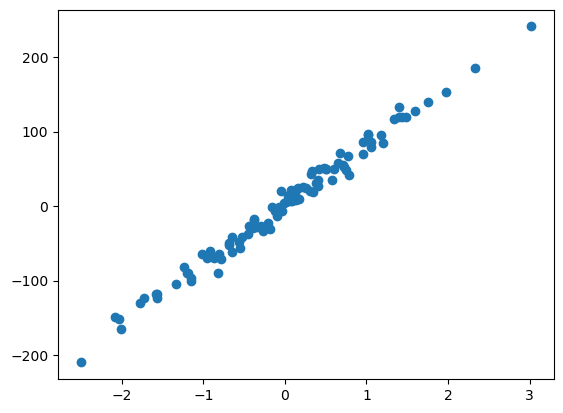

In [132]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

x,y = make_regression(n_samples=100,n_features = 1 ,noise=10.0)
#Normalizing x
x_data = x[:,0:2]
x = (x_data - np.mean(x_data,axis=0)) / np.std(x_data,axis=0)
y = y.reshape(-1,1)
plt.figure()
plt.scatter(x,y)

<h1>Create the params theta AND X+BIAS</h1>

In [134]:
X = np.hstack((x,np.ones((x.shape[0],1))))
theta = np.random.randn(2,1)


<h1>Making the model</h1>

In [136]:
def model(X,theta):
    return X.dot(theta)


<h1>Calculate the MSE</h1>

In [138]:
def error_function(X,y,theta):
    #getting the number of sample
    m = len(y)
    return (1/(2 * m)) * (np.sum(model(X,theta)-y)) ** 2

def gradient(X,y,theta):
    m = len(y)
    #do not forget to transpose
    return (1/m) * X.T.dot(model(X,theta)-y)
    
#gradient(X,y,theta)

<h1>MAKING THE GRADIENT DESCENT</h1>


In [140]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta =theta -  learning_rate * gradient(X,y,theta)
        cost_history[i] = error_function(X,y,theta)
        
    return theta,cost_history


<h1>GETTING THE THETA FINAL</h1>

In [165]:
learning_rate = 0.01
n_iterations = 800

final_theta,cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)
cost_history = cost_history.reshape(-1,1)
final_theta
cost_history.shape

(800, 1)

<h1>Lets predict and show result with matplotlib</h1>

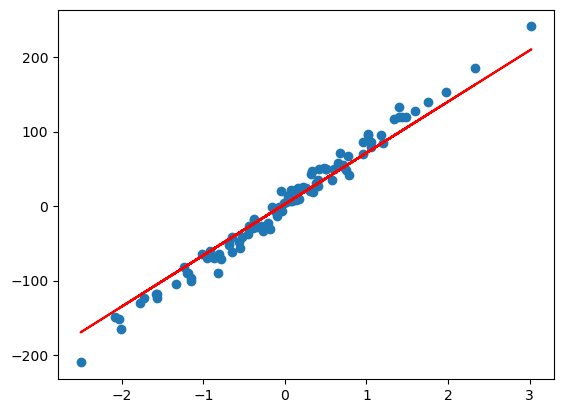

In [144]:
prediction = model(X,final_theta)
plt.figure()
plt.scatter(x,y)
plt.plot(x,prediction,c='r')

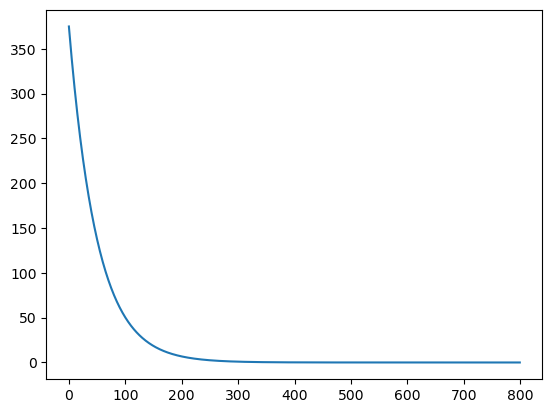

In [167]:
plt.figure()
plt.plot(range(800),cost_history)